In [1]:
#@title Imports
#%load_ext autoreload  #Need to uncomment for import sometime, dont understand

#Tensorflow :
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
import tensorflow_datasets as tfds
#from google.colab import files

#Others :
from matplotlib import image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random as rd
import cv2
import csv

#Data loaders :
from loadFer2013DS import *
from loadRavdessDS import *
from loadExpWDS import *
from loadAffwildDS import *

#Others
from utils import *
from config import *

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Model used: firstModel


In [14]:
a = np.array([[1,2], [3,4]])	   
np.resize(a, (4,4))

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [3]:
#CHargement des données
Xf, Yf = loadFer2013Data()
Xr, Yr = loadRavdessData()
Xe, Ye = loadExpWData(90000, count=True)
Xa, Ya = loadAffwildData()

X_train, Y_train, X_test, Y_test = mergeToDatabase([Xf, Xr, Xe, Xa], [Yf, Yr, Ye, Ya])


CHARGEMENT DE 35887 DONNEES DEPUIS FER2013 ...


KeyboardInterrupt: 

In [ ]:
#@title Visualisation de chaque dataset
for X, Y, name in zip([Xf, Xr, Xe, Xa], [Yf, Yr, Ye, Ya], ["fer2013", "ravdess", "expW", "affwild"]):
    N=5
    M=5
    print("Dataset:", name)
    print("Images:", X.shape, "La   bels:", Y.shape)
    plt.figure()
    for i in range(N*M):
        if X.shape[0] == 0: continue
        k = rd.randrange(X.shape[0])
        plt.subplot(N, M, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        afficher(X[k])
        plt.title(emotions[int(Y[k])])
    plt.show()

In [5]:
#Visualisation du dataset global
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)

print("\nX_test:", X_test.shape)
print("Y_test:", Y_test.shape)

N=5
M=5
plt.figure()
for i in range(N*M):
    k = rd.randrange(X_train.shape[0])
    plt.subplot(N, M, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    afficher(X_train[k])
    plt.title(emotions[int(Y_train[k])])
plt.show()

NameError: name 'X_train' is not defined

In [6]:
#@title Hyperparamètres
epochs = 
batch_size = 128
validation_size = 0.1

In [8]:
#Labels catégoriques
Y_train_cat = keras.utils.to_categorical(Y_train)
Y_test_cat = keras.utils.to_categorical(Y_test)

print("X_train:", X_train.shape)
print("Y_train:", Y_train_cat.shape)

print("\nX_test_cat:", X_test.shape)
print("Y_test_cat:", Y_test_cat.shape)

X_train: (81000, 48, 48, 1)
Y_train: (81000, 7)

X_test_cat: (9001, 48, 48, 1)
Y_test_cat: (9001, 7)


In [9]:
#MODELE
class MyModel(keras.Sequential):

    def __init__(self, input_shape):
        super(MyModel, self).__init__()
        self.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))        
        self.add(keras.layers.MaxPooling2D(pool_size = 2))
        self.add(keras.layers.BatchNormalization())

        self.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
        self.add(keras.layers.MaxPooling2D(pool_size = 2))
        self.add(keras.layers.BatchNormalization())

        self.add(keras.layers.Conv2D(96, kernel_size = (3, 3), activation = 'relu'))
        self.add(keras.layers.MaxPooling2D(pool_size = 2))
        self.add(keras.layers.BatchNormalization())

        self.add(keras.layers.Flatten())

        self.add(keras.layers.Dense(64, activation = 'relu'))
        self.add(keras.layers.BatchNormalization())
        
        self.add(keras.layers.Dense(7, activation = 'softmax'))
    
    def predir(self, monImage):
        return self.predict(np.array([monImage]))[0,:]

    def compile_o(self):
        self.compile(optimizer = 'adam', loss=losses.categorical_crossentropy, metrics = ['accuracy'])

myModel = MyModel(input_shape)
myModel.compile_o()

[0.15433358 0.14506394 0.16671737 0.1411671  0.13488784 0.13087346
 0.12695667]


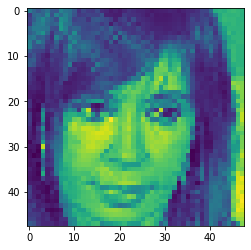

In [10]:
theImage = X_train[5]
afficher(theImage)
print(predir(myModel, theImage))

In [13]:
history = myModel.fit(X_train, Y_train_cat, epochs=epochs, validation_data=(X_test, Y_test_cat))

#Affichage de l'historique de l'apprentissage
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.ylim([min(history.history['val_accuracy']+history.history['accuracy']), 1])
plt.show()

Epoch 1/5
 880/2532 [=========>....................] - ETA: 1:01 - loss: 0.8081 - accuracy: 0.7104

In [12]:
myModel.save('exp901')

INFO:tensorflow:Assets written to: exp901\assets
